In [1]:
import numpy as np
import matplotlib.pyplot as plt
import model as mdl
import kernel as knl
import valid as vld

In [2]:
# dataset
n = 50
x = np.linspace(-3,3,n)
y_true = np.sin(np.pi*x)/(np.pi*x) + 0.1 * x
y = y_true + 0.2 * np.random.randn(n)

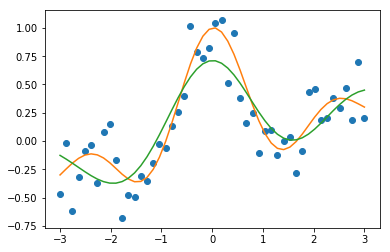

In [3]:
# test
model = mdl.L2LinearKernelModel(knl.GaussKernel(), np.ones(n))
model.train(x,y)
plt.plot(x,y, 'o')
plt.plot(x,y_true)
plt.plot(x,model(x))
plt.show()

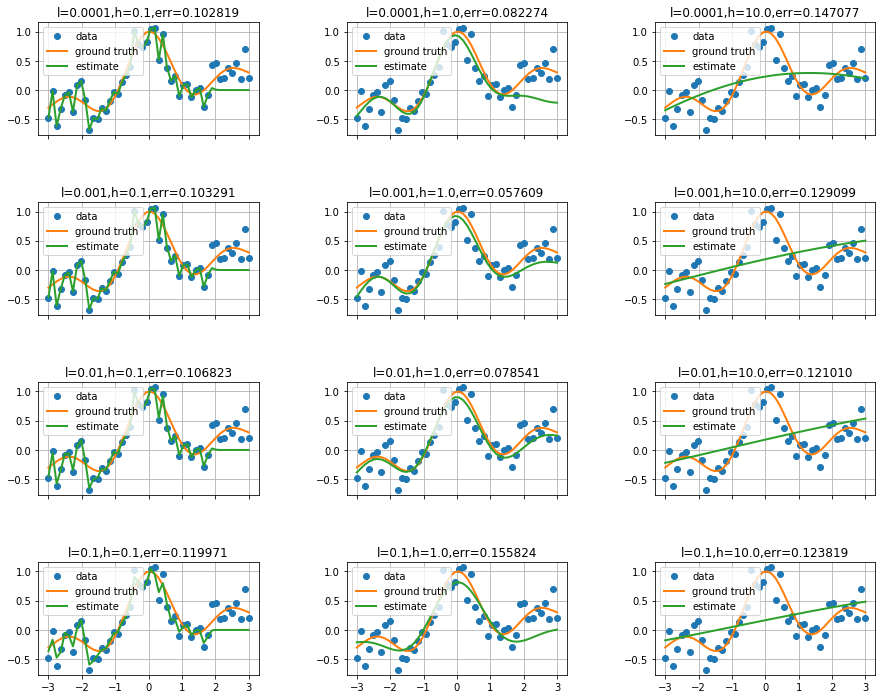

In [5]:
model = mdl.L2LinearKernelModel(knl.GaussKernel(), np.ones(40))

# some settings
k = 10 # cross valid params (run k-crossvalid)

# parameter candidates
h_list = [0.1, 1.0, 10.0]
l_list = [0.0001, 0.001, 0.01, 0.1]

# plot
fig,axes = plt.subplots(nrows=len(l_list),ncols=len(h_list),figsize=(15,12),sharex=True)
fig.subplots_adjust(wspace=0.4, hspace=0.6)

# for all candidates
for i,l in enumerate(l_list):
    for j,h in enumerate(h_list):
        model.setCriteriaParams(l)
        model.setKernelParams(h)
        loss = vld.cross_validation(x,y,n/k,model)
        
        # draw
        axes[i,j].plot(x, y, 'o', linewidth=2, label="data")
        axes[i,j].plot(x, y_true, linewidth=2, label="ground truth")
        axes[i,j].plot(x, model(x), linewidth=2, label="estimate")
        axes[i,j].legend()
        axes[i,j].set_title("l="+str(l)+",h="+str(h)+",err="+("%4f" % loss))
        axes[i,j].grid(True)
